# Detección de Sargazo

Proyecto final

**Reconocimiento de Patrones**, Facultad de Ingeniería. UNAM

20 de agosto de 2021

- Martínez Ostoa, Néstor Iván
- Ramírez Bondi, Jorge Alejandro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from PIL import Image

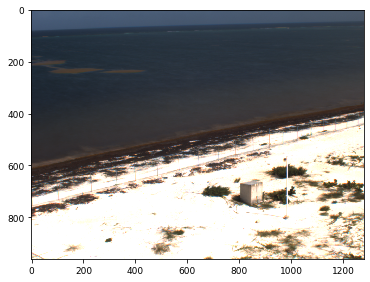

In [37]:
img = imread('imgs/2021-05-27/1622157340.Thu.May.27_23_15_40.GMT.2021.morelos.c2.timex.png')
img = imread('imgs/2021-06-11/1623442800.Fri.Jun.11_20_20_00.GMT.2021.morelos.c2.timex.png')
plt.figure(figsize=(6, 4))
imshow(img)

In [4]:
def img_pandas(img):
    df = pd.DataFrame(
        [
            img[:, :, 0].flatten(),
            img[:, :, 1].flatten(),
            img[:, :, 2].flatten()
        ]
    ).T
    df.columns = ['Red', 'Green', 'Blue']
    return df


df_img = img_pandas(img)
df_img

KeyboardInterrupt: 

## K-Means

**Clústers de clasificación**

1. Cielo
2. Playa
3. Agua
4. Sargazo

/usr/local/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


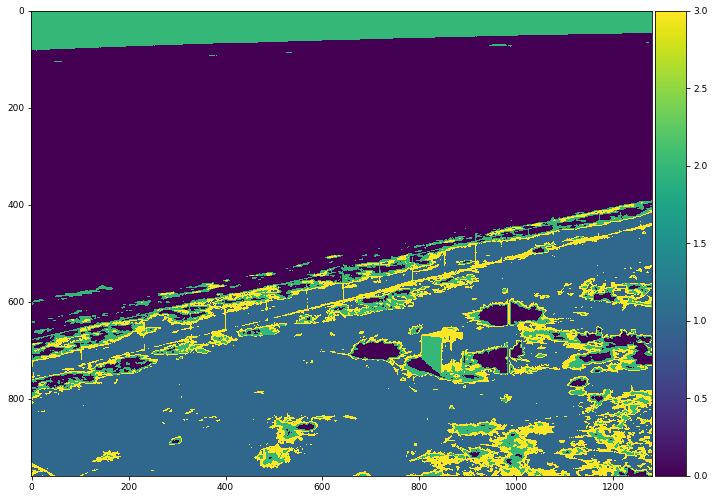

In [38]:
kmeans = KMeans(n_clusters=4, random_state=1304).fit(img.reshape(-1, 3))
class_img = kmeans.labels_.reshape(img.shape[0], img.shape[1])
plt.figure(figsize=(10, 8))
imshow(class_img, cmap='viridis')
plt.show()

## Felzenszwalb's segmentation

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


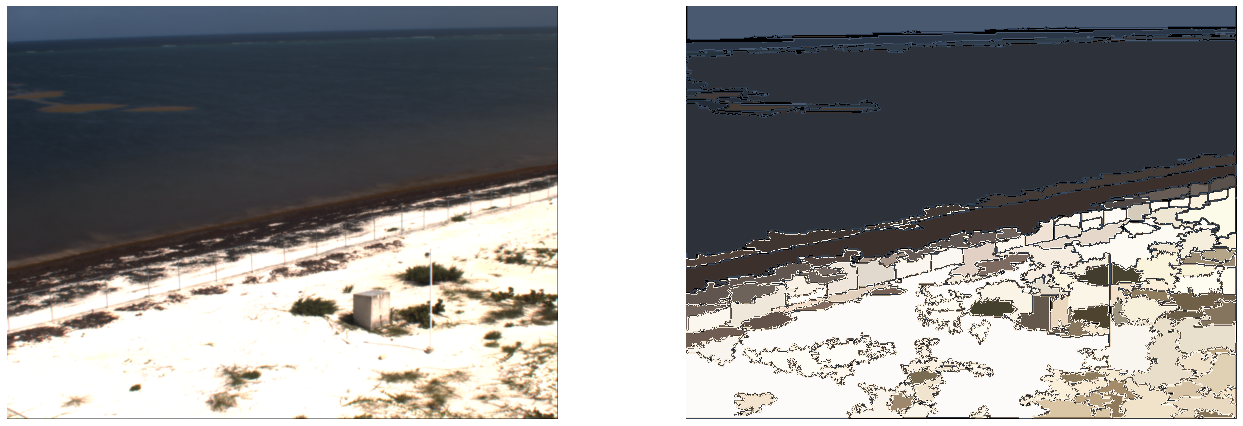

In [60]:
from matplotlib.colors import LinearSegmentedColormap
from skimage.segmentation import felzenszwalb, find_boundaries, mark_boundaries, slic
from skimage.util import img_as_float


img = img_as_float(img)
plt.figure(figsize=(20, 6))
seg_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=700)
borders = find_boundaries(seg_fz)
unique_colors = np.unique(seg_fz.ravel())
seg_fz[borders] = -1
colors = [np.zeros(3)]
for color in unique_colors:
    colors.append(np.mean(img[seg_fz == color], axis=0))
cm = LinearSegmentedColormap.from_list('pallete', colors, N=len(colors))

# Plotting original
plt.subplot(121)
plt.imshow(img)
plt.axis('off')

# Plotting segmented image
plt.subplot(122)
plt.imshow(seg_fz, cmap=cm)
plt.axis('off')
plt.tight_layout()
plt.show()

### Obteniendo los segmentos uno a uno

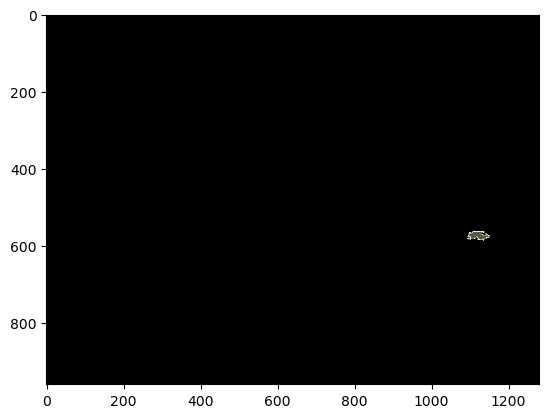

In [38]:
# TODO: 1. Ciclar esto para todas las imágenes y todos los segmentos únicos por
# imagen.
# 2. Almacenar cada imagen y clasificar
a = np.where(seg_fz != 74)
seg_fz_temp = seg_fz
seg_fz_temp[a] = 1
plt.imshow(seg_fz_temp, cmap=cm)
plt.show()

## SLIC

In [4]:
def get_segments(img, k, compactness, sigma=None):
    return slic(img, n_segments=k, compactness=compactness, start_label=1, sigma=sigma)

def show_img_with_segments(img, segments=None, k=None, compactness=None, axis=None):
    if segments is None:
        if k is None or compactness is None: 
            raise Exception("'k' and 'compactnes' should have value")
        segments = get_segments(img, k, compactness)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(2,2,1)
    if axis is None: ax.axis('off')
    ax.set_title(f'Image with k={k} superpixels\nCompactness level: {compactness}')
    plt.imshow(mark_boundaries(img, segments))
    plt.tight_layout()
    plt.show()

def show_img_with_ks(img, Ks, Cs, img_name=None):
    """
    Ks: array of number of superpixels
    Cs: array of compactness for each K
    """
    if len(Ks) == 1: 
        show_img_with_segments(img, Ks[0], Cs[0])
        return
    fig, ax = plt.subplots(
        nrows=1, ncols=len(Ks), sharex=True, sharey=True,
        figsize=(10,10)
    )
    for idx, k in enumerate(Ks):
        c = Cs[0] if idx >= len(Cs) else Cs[idx]
        segments = get_segments(img, k, c)
        ax[idx].imshow(mark_boundaries(img, segments))
        if img_name is None: ax[idx].set_title(f'K: {k} superpixels\nCompactnes: {c}')
        else: ax[idx].set_title(f'{img_name}\nK: {k} superpixels\nCompactnes: {c}')
        ax[idx].axis('off')
    plt.tight_layout()
    plt.show()

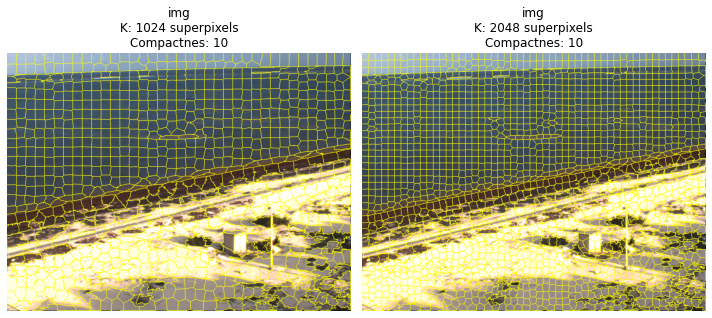

In [11]:
img = imread('imgs/2021-05-27/1622157340.Thu.May.27_23_15_40.GMT.2021.morelos.c2.timex.png')
Ks = [1024, 2048]
Cs = [10]
show_img_with_ks(img, Ks=Ks, Cs=Cs, img_name='img')